In [45]:
"""
The aim of this notebook is to find the calbration curve of
a set of regression models. One problem we've faced is the 
size of the data we are working with. The current shape of
the CSV file is about 6800 x 95, which makes it hard to train
all the data we are working with. 
"""
import matplotlib.pyplot as plt
import numpy as np
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import pandas as pdfrom sklearn.decomposition import PCAfrom imblearn.over_sampling import SMOTE

In [46]:
# Prep the data
df = pd.read_csv('data.csv')

X = df.drop(['Bankrupt?'], axis=1)
y = df['Bankrupt?']

# Oversampling to combat unbalanced data
oversample = SMOTE()
X, y=oversample.fit_resample(X,y)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# We are training at 30% right now, might adjust that in a bit

x_train.shape

(4773, 95)

In [47]:
adjusted_data = PCA(n_components=6).fit(x_train, y_train)

In [48]:
# Build a logistic regression model
log_model = LogisticRegression(max_iter=1_000_000_000).fit(x_train, y_train)

log_predictions = log_model.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(log_predictions*100))

Test accuracy: 96.9208


In [49]:
# Build a SVC model
svc_model = SVC(max_iter=1_000_000_000).fit(x_train, y_train)

svc_predictions = svc_model.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(svc_predictions*100))

Test accuracy: 97.3118


In [50]:
# Build a Random Forest Classifier
rfc_model = RandomForestClassifier().fit(x_train, y_train)

rfc_predictions = rfc_model.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(rfc_predictions*100))

Test accuracy: 97.0186


In [51]:
# Decision tree classifier 🤔 
dtc_model = DecisionTreeClassifier().fit(x_train, y_train)

dtc_predictions = dtc_model.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(dtc_predictions*100))

Test accuracy: 95.0635


In [52]:
# K Nearest Neighbor Classifier
knn_model = KNeighborsClassifier().fit(x_train, y_train)

knn_predictions = knn_model.score(x_test, y_test)
print("Test accuracy: {:.4f}".format(knn_predictions*100))

Test accuracy: 97.1163


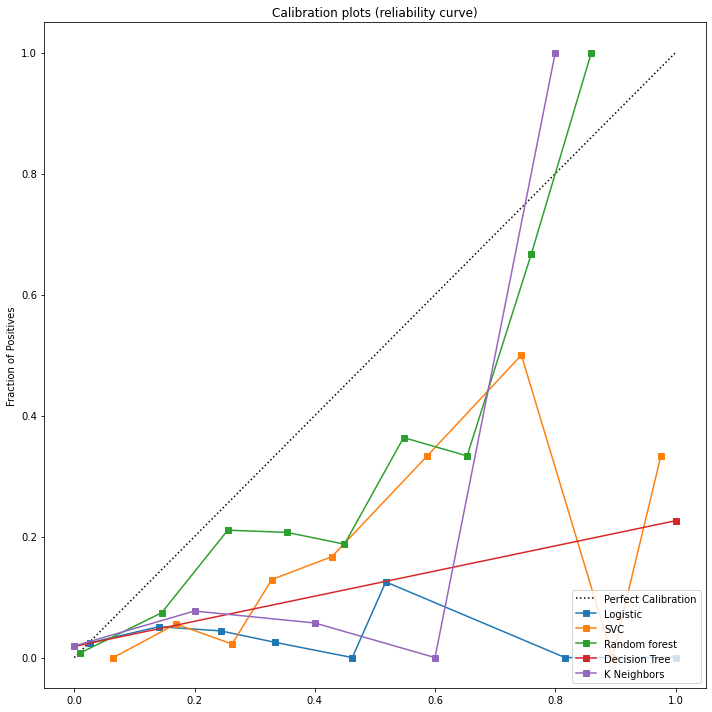

In [59]:
models = [(log_model, 'Logistic'), (svc_model, 'SVC'), (rfc_model, "Random forest"), (dtc_model, "Decision Tree"), (knn_model, "K Neighbors")]

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot()

ax.plot([0, 1], [0, 1], "k:", label='Perfect Calibration')
for model, name in models:
    model.fit(x_train, y_train)
    if hasattr(model, "predict_proba"):
        prob_pos = model.predict_proba(x_test)[:, 1]
    else:
        prob_pos = model.decision_function(x_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)
        
    ax.plot(mean_predicted_value, fraction_of_positives, "s-", label="%s" % (name, ))

ax.set_ylabel("Fraction of Positives")
ax.set_ylim([-0.05, 1.05])
ax.legend(loc='lower right')
ax.set_title("Calibration plots (reliability curve)")

plt.tight_layout()
plt.show()